In [1]:
#Prequsites
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Model 1 - 2018-2024 

stratified sampling, k cross fold validation not possible 

## Load Data

In [242]:
	
X_train_2018 = pd.read_csv('../data/train/train.csv')
y_train_2018 = pd.read_csv('../data/train/train_labels.csv')

X_test_2018 = pd.read_csv('../data/test/test.csv')
y_test_2018 = pd.read_csv('../data/test/test_labels.csv')


## Preprocessing

In [243]:
# Drop specified columns from train and test datasets
columns_to_drop = ['driver_nationality','resultId', 'raceId', 'race_name','number', 'race_time', 'fp1_date', 'fp2_date', 'q1', 'q2','q3','fp3_date', 'fp1_time', 'fp2_time', 'fp3_time', 'quali_time', 'quali_date', 'race_location', 'race_country', 'driver_code']

X_train_2018 = X_train_2018.drop(columns=columns_to_drop)
X_test_2018 = X_test_2018.drop(columns=columns_to_drop)


### Calculating Age

In [244]:
from datetime import datetime

#Calculate Age for Train: 
X_train_2018['race_date'] = pd.to_datetime(X_train_2018['race_date'])
X_train_2018['driver_dob'] = pd.to_datetime(X_train_2018['driver_dob'])

X_train_2018['age'] = X_train_2018.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

X_train_2018 = X_train_2018.drop(columns=['driver_dob'])
X_train_2018 = X_train_2018.drop(columns=['race_date'])

# Calculate Age for Test
X_test_2018['race_date'] = pd.to_datetime(X_test_2018['race_date'])
X_test_2018['driver_dob'] = pd.to_datetime(X_test_2018['driver_dob'])

X_test_2018['age'] = X_test_2018.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

X_test_2018 = X_test_2018.drop(columns=['driver_dob'])
X_test_2018 = X_test_2018.drop(columns=['race_date'])

In [245]:
# Filter X_train and X_test for entries where the year is greater than 2018
X_train_2018c = X_train_2018[X_train_2018["year"] >= 2018]
X_test_2018c = X_test_2018[X_test_2018["year"] >= 2018]

# Filter y_train and y_test based on the same condition applied to X_train and X_test
y_train_2018c = y_train_2018[X_train_2018["year"] >= 2018]
y_test_2018c = y_test_2018[X_test_2018["year"] >= 2018]

# Print the shapes of the filtered datasets
print("X_train_2018 shape:", X_train_2018c.shape)
print("X_test_2018 shape:", X_test_2018c.shape)
print("y_train_2018 shape:", y_train_2018c.shape)
print("y_test_2018 shape:", y_test_2018c.shape)

X_train_2018 shape: (2340, 59)
X_test_2018 shape: (579, 59)
y_train_2018 shape: (2340, 1)
y_test_2018 shape: (579, 1)


In [246]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder().fit(y_train_2018c)
y_train_2018c = label_encoder.fit_transform(y_train_2018c)
y_test_2018c = label_encoder.transform(y_test_2018c)

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


## Normalisation

In [247]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train_2018c = pd.DataFrame(
    min_max_scaler.fit_transform(X_train_2018c),
    columns=X_train_2018c.columns,
    index=X_train_2018c.index
)

X_test_2018c = pd.DataFrame(
    min_max_scaler.transform(X_test_2018c),
    columns=X_test_2018c.columns,
    index=X_test_2018c.index
)


In [248]:
X_train_2018c.head()

,driverId,constructorId,grid,year,round,circuitId,race_lat,race_lng,race_alt,min_pit_stop_duration,...,fp3_avg_sector_1,fp3_avg_sector_2,fp3_avg_lap_time,fp3_avg_speedI1,fp3_avg_speedI2,fp3_avg_speedFL,fp3_avg_speedST,fp3_avg_tyre_life,fp3_avg_is_on_fresh_tyres,age
32,0.993023,0.233645,0.60,0.666667,0.571429,0.126582,0.946698,0.516726,0.121307,0.002744,...,0.703477,0.539714,0.695506,0.567024,0.264676,0.401805,0.316216,0.309677,0.5,0.20
42,0.975581,0.009346,0.50,0.000000,0.142857,0.911392,0.866838,0.634373,0.000000,0.001895,...,0.716919,0.576536,0.660225,0.567024,0.444054,0.890417,0.648649,0.051613,1.0,0.04
69,0.982558,0.000000,0.25,0.500000,0.857143,0.215190,0.156763,0.263216,0.354521,0.001216,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.16
71,0.984884,0.009346,0.95,0.666667,1.000000,0.291139,0.690580,0.652631,0.004476,0.002571,...,0.061303,0.458224,0.426710,0.835657,0.936779,0.339665,0.833514,0.175484,0.8,0.32
80,0.000000,0.607477,0.05,0.500000,0.904762,0.974684,0.701914,0.640526,0.008505,0.003702,...,0.393033,0.238674,0.376242,0.649866,0.663823,0.818221,0.703784,0.185806,0.4,0.72


## Learning the Modell

### Random Forrest

In [326]:
#Try random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

random_forest = RandomForestClassifier(max_depth=2, random_state=0)

# K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#K-Fold Cross-Validation Scores
scores = cross_val_score(random_forest, X_train_2018c, y_train_2018c, cv=skf, scoring='neg_mean_squared_error')

# Mean MSE, RMSE
mean_mse = -scores.mean()
mean_rmse = sqrt(mean_mse)

print("Mean Squared Error (MSE) on train-Set:", mean_mse)
print("Root Mean Squared Error (RMSE) on train-set:", mean_rmse)


random_forest.fit(X_train_2018c, y_train_2018c) #learning step



Mean Squared Error (MSE) on train-Set: 23.3008547008547
Root Mean Squared Error (RMSE) on train-set: 4.8270958868510885


RandomForestClassifier(max_depth=2, random_state=0)

In [10]:
# Predict the labels of the test set
X_rf_pred = random_forest.predict(X_test_2018c)
print(X_rf_pred)

[11  8  5 13 12 11 19 13 19  8  0  9  5 13 13 11  1 12 13  0  1  9 13  1
  9  1  9  0  5  8  8  7  5  5 19  1  0  1 13  0 13 13 13 13 13  9 13  1
  7 13  1 13  5 13  1  0  0 19  2  5 11 13  8  0 13 13  1 13 13  5 13 19
  0  8  0 19  5  0  0 13 13  0 11 19 11 19 11  5 12 19  0 19 19  2  1  0
 13 11  0  9 13 13  5  9 13 13  5  1 13  1  0  7 13  0  5 13  0  0  9 13
  0 13  8 13  1 13 13 13 13 13  5  9 19  0 13 11  0 13  1  5  5  0  7 19
 13  1  1  1  0 13  0 13 15 13  0  0 11 19 11  5 13  8 19  0  7  7  0  5
 19 19 13 16  9  5  1  1  5  0 13 13  7  1 13  7  7 13  0  1  7  0  2  0
 13 11  8  5  0  1 13  7  1 11 13 19  0 13  1 13  7  0  0 19  0 13 13 11
 19 13 13 13  5  0 11 13 19 13 19  2 19 13  5 19 13  7 19  9 19 19 13 13
 11 13 13 11  1 13 13 13 13  7  8  8 13  5  8 11 13 13  5  5  3  9  1  7
  0 13 11  5 11  0 19 13 13 13  8  5 19 13  7 19  0 13  8 13 19 13 19 12
 13  0  8  5 13 13  1  9 13 11  8 13  5  5 11 11 12 13 13 13  8 13 13 13
  0 13  1  9  0  0 13 11 13  5  1  7  0  5  0  1 13

#### Hyperparameter Tuning via Successive Halving

In [13]:
#Takes 2 min 30 sec
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import HalvingRandomSearchCV


rng = np.random.RandomState(42)

clf = RandomForestClassifier( random_state = rng)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.75]
}
#Stratified K-Fold Cross Validation 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_rsh = HalvingRandomSearchCV(
    estimator=clf, param_distributions=param_dist, factor=2, random_state=rng,cv=skf, scoring='neg_mean_squared_error')

# Best parameters and score

rf_rsh.fit(X_train_2018c, y_train_2018c)

print("Beste Parameter für Random Forest:", rf_rsh.best_params_)
print("Bester Score für Random Forest:", sqrt(-rf_rsh.best_score_))

Beste Parameter für Random Forest: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.75, 'max_depth': 20}
Bester Score für Random Forest: 4.756968572525995


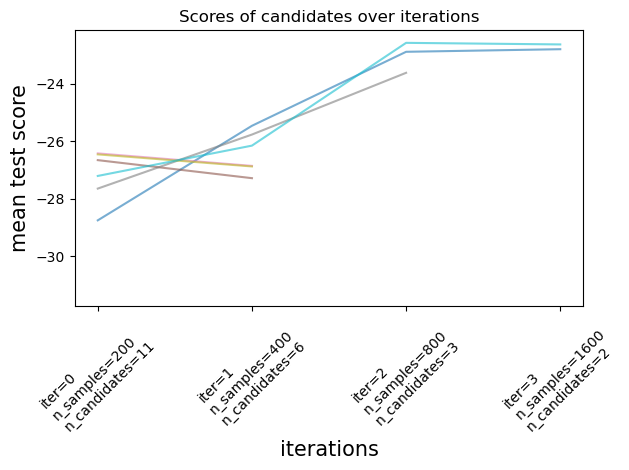

In [14]:
results = pd.DataFrame(rf_rsh.cv_results_)
results["params_str"] = results.params.apply(str)
results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
mean_scores = results.pivot(
    index="iter", columns="params_str", values="mean_test_score"
)
ax = mean_scores.plot(legend=False, alpha=0.6)

labels = [
    f"iter={i}\nn_samples={rf_rsh.n_resources_[i]}\nn_candidates={rf_rsh.n_candidates_[i]}"
    for i in range(rf_rsh.n_iterations_)
]

ax.set_xticks(range(rf_rsh.n_iterations_))
ax.set_xticklabels(labels, rotation=45, multialignment="left")
ax.set_title("Scores of candidates over iterations")
ax.set_ylabel("mean test score", fontsize=15)
ax.set_xlabel("iterations", fontsize=15)

plt.tight_layout()
plt.show()

### XG Boost

In [327]:
# XGBoost
import xgboost as xgb

clf_xg = xgb.XGBClassifier(random_state=42)

# K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#K-Fold Cross-Validation Scores
scores = cross_val_score(clf_xg, X_train_2018c, y_train_2018c, cv=skf, scoring='neg_mean_squared_error')

# Mean MSE, RMSE
mean_mse = -scores.mean()
mean_rmse = sqrt(mean_mse)

print("Mean Squared Error (MSE) on train-Set:", mean_mse)
print("Root Mean Squared Error (RMSE) on train-set:", mean_rmse)


clf_xg.fit(X_train_2018c, y_train_2018c)


Mean Squared Error (MSE) on train-Set: 21.453846153846154
Root Mean Squared Error (RMSE) on train-set: 4.631829676687837


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [16]:
# Prediction
X_pred_xg = clf_xg.predict(X_test_2018c)
print(X_pred_xg)

[18  8 16  3 12 15  6 15 19  8  3  6  7 10 17  9  3 10 12  0  3  9 13  4
  4  1  8  2  5  8  8  8 15  7 18  2  1  3  8  0 18 15 16 13 16 11 11  1
  6 13  3 13  6  4  1  0  2  5  5 18  9 13  3 10 11  9  2 16 12  4  7 18
  1  5  1 19 10  2  1 16 15  2 12 16  8 19  7  5 11 19  0 14 18  6  2 12
  9 15  1 12  7  6 10  6 18 13  6  6 17  3  3  6 11  1  8 14  3  1  8 12
 17 15  6 14  2 11  6 16  7 16  4  8 18  4 11 11  0 12  2  8  7  1  4 18
 17  7  6  4  3 14  4  9 18 13  8  0  9 19  9  6 13  3 19  0  2  5  5  4
 19 19 12 16 11 19  2  4  5  1 16 11 10  2 13  7 19 12  2  1  5  0  2  4
 13 12  6  6  1  2 17  7  2 16 14 19  2 14  3 12 10  0 16 18  1  3  9  9
 19  6 13 17  4  1 10 18 19  7 18  5 19 11 19 18 17 17 18  8 18 19 17  3
 14 15 14 16  4  7  8 14 11  6  7 11 11  9  5 12  9 18  9  6 10 10 15  7
  1 12  7  5  9  4 18 17 14 17 15 10 19  7  9 19  3 17  8  9 18 13 16  7
 14  1  6  9 12 12  3  9 11  9 14 16  4  3  9  6 16 10 17 13  8  5 18 16
  1 10  1 13 14  2  8  5 11  3  3  5  0  5  1  2 10

#### Hyperparameter Tuning via successive halving

In [17]:
#Takes 2 min 30 sec

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold

# Successive Halving Hyperparameter Tuning for XGBoost
xgb_clf = xgb.XGBClassifier(random_state=42)

# Parameter-Grid
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

#K-Fold Cross Validation

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Halving Random Search
rsh_xgb = HalvingRandomSearchCV(
    estimator=xgb_clf, param_distributions=param_dist_xgb, factor=2, random_state=42, cv=skf, scoring='neg_mean_squared_error'
)

rsh_xgb.fit(X_train_2018c, y_train_2018c)

# Best parameters and score
print("Beste Parameter für XGBoost:", rsh_xgb.best_params_)
print("Bester Score für XGBoost:", sqrt(-rsh_xgb.best_score_))
#4.71559


Beste Parameter für XGBoost: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Bester Score für XGBoost: 4.733325997646897


#### Hyperparameter tuning via randomized search 

In [18]:
#dauert 17 min 5 sek
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, mean_squared_error
from math import sqrt

# Initialising XGBoost Classifier
xgb = xgb.XGBClassifier(random_state=42)

# Hyperparameter-Raum
param_dist_xgb = {
    'n_estimators': [ 150, 250],
    'max_depth': [5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [ 0.8, 0.9, 1.0],
    'colsample_bytree': [ 0.75, 0.85]
}

# K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV with K-Fold Cross-Validation
random_search2018 = RandomizedSearchCV(
    estimator=xgb, param_distributions=param_dist_xgb, n_iter=50, cv=skf, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1
)

# Modelltraining
random_search2018.fit(X_train_2018c, y_train_2018c)

# Beste Parameter und Score
print("Beste Parameter:", random_search2018.best_params_)
print("Bester Score:", sqrt(-random_search2018.best_score_))


Beste Parameter: {'subsample': 0.8, 'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.75}
Bester Score: 4.449959185446171


In [19]:
#Saving the model
import pickle

with open("random_search2018.pkl",'wb') as file: 
    pickle.dump(random_search2018, file)


### KNN

In [20]:
#Testing a KNN Classifier with an imputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Pipeline with an Imputer and KNeighborsClassifier
pipelineknn = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])
pipelineknn.fit(X_train_2018c, y_train_2018c)


Pipeline(steps=[('imputer', SimpleImputer()), ('knn', KNeighborsClassifier())])

### Random Forrest Regressor 

In [325]:
#Try random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

random_forest_reg = RandomForestRegressor(max_depth=2, random_state=42) 

# K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#K-Fold Cross-Validation Scores
scores = cross_val_score(random_forest_reg, X_train_2018c, y_train_2018c, cv=skf, scoring='neg_mean_squared_error')

# Mean MSE, RMSE
mean_mse = -scores.mean()
mean_rmse = sqrt(mean_mse)

print("Mean Squared Error (MSE) on train-Set:", mean_mse)
print("Root Mean Squared Error (RMSE) on train-set:", mean_rmse)


random_forest.fit(X_train_2018c, y_train_2018c) #Learning process of the model



Mean Squared Error (MSE) on train-Set: 18.10169999051746
Root Mean Squared Error (RMSE) on train-set: 4.254609264141357


RandomForestClassifier(max_depth=2, random_state=0)

# Modell 4 - 1950-2018

## Load Data

In [249]:
	
X_train_1950 = pd.read_csv('../data/train/train.csv')
y_train_1950 = pd.read_csv('../data/train/train_labels.csv')

X_test_1950 = pd.read_csv('../data/test/test.csv')
y_test_1950 = pd.read_csv('../data/test/test_labels.csv')


In [250]:
# Drop specified columns from train and test datasets
columns_to_drop = ['driver_nationality','resultId', 'raceId', 'race_name','number', 'race_time', 'fp1_date', 'fp2_date', 'q1', 'q2','q3','fp3_date', 'fp1_time', 'fp2_time', 'fp3_time', 'quali_time', 'quali_date', 'race_location', 'race_country', 'driver_code']

X_train_1950 = X_train_1950.drop(columns=columns_to_drop)
X_test_1950 = X_test_1950.drop(columns=columns_to_drop)


In [251]:

#Drop all other Data where there is no Data available
X_train_1950 = X_train_1950.drop(columns=X_train_1950.loc[:, 'min_pit_stop_duration':'fp3_avg_is_on_fresh_tyres'].columns)
X_test_1950 = X_test_1950.drop(columns=X_test_1950.loc[:, 'min_pit_stop_duration':'fp3_avg_is_on_fresh_tyres'].columns)

### Calculate Driver Age

In [252]:
from datetime import datetime

#Calculate Age for Train: 
X_train_1950['race_date'] = pd.to_datetime(X_train_1950['race_date'])
X_train_1950['driver_dob'] = pd.to_datetime(X_train_1950['driver_dob'])

X_train_1950['age'] = X_train_1950.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

X_train_1950 = X_train_1950.drop(columns=['driver_dob'])
X_train_1950 = X_train_1950.drop(columns=['race_date'])

# Calculate Age for Test
X_test_1950['race_date'] = pd.to_datetime(X_test_1950['race_date'])
X_test_1950['driver_dob'] = pd.to_datetime(X_test_1950['driver_dob'])

X_test_1950['age'] = X_test_1950.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

X_test_1950 = X_test_1950.drop(columns=['driver_dob'])
X_test_1950 = X_test_1950.drop(columns=['race_date'])

### Creation of a maximal_driver attribute

In [253]:
#Creation of a new feature which highligths the maximum number of drivers per year, such that the possible can learn not to predict a value in race which is higher than the drivers competing in the race

# Join Target to Features
X_train_1950 = X_train_1950.join(y_train_1950)
X_test_1950 = X_test_1950.join(y_test_1950)

# Combine Train and Test Data
X_combined = pd.concat([X_train_1950, X_test_1950], keys=['train', 'test'])

# Determine the maximum number of drivers per year
max_drivers_per_year = X_combined.groupby('year')['positionOrder'].max().reset_index()
max_drivers_per_year.columns = ['year', 'max_drivers']

# Add new feature to the combined data
X_combined = pd.merge(X_combined.reset_index(), max_drivers_per_year, on='year', how='left')

# Split the combined data back into train and test data
X_train_1950 = X_combined[X_combined['level_0'] == 'train'].drop(columns=['level_0', 'level_1']).reset_index(drop=True)
X_test_1950 = X_combined[X_combined['level_0'] == 'test'].drop(columns=['level_0', 'level_1']).reset_index(drop=True)

# Drop the positionOrder column from the train and test data
X_train_1950 = X_train_1950.drop(columns=['positionOrder'])
X_test_1950 = X_test_1950.drop(columns=['positionOrder'])

print("X_train_1950:")
X_train_1950.head()
print("\nX_test_1950:")
X_test_1950.head()

X_train_1950:

X_test_1950:


,driverId,constructorId,grid,year,round,circuitId,race_lat,race_lng,race_alt,age,max_drivers
0,233,34,19,1977,13,39,52.3888,4.54092,6,26,36
1,182,1,12,1983,15,30,-25.9894,28.07670,1460,34,29
2,852,213,15,2023,7,4,41.5700,2.26111,109,23,20
3,627,6,14,1954,1,25,-34.6943,-58.45930,8,48,33
4,94,35,15,1992,5,21,44.3439,11.71670,37,31,32


In [254]:

y_train_1950 = y_train_1950.values.ravel()
y_test_1950 = y_test_1950.values.ravel()

In [255]:
label_encoder = preprocessing.LabelEncoder().fit(y_train_1950)
y_train_1950 = label_encoder.fit_transform(y_train_1950)
y_test_1950 = label_encoder.transform(y_test_1950)

In [256]:
label_encoder.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

## Normalisation

In [257]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Step 1: Save the 'max_drivers' column separately and drop it from the original data
max_drivers_train = X_train_1950['max_drivers']  
max_drivers_test = X_test_1950['max_drivers']   
X_train_1950c = X_train_1950.drop(columns=['max_drivers'])
X_test_1950c = X_test_1950.drop(columns=['max_drivers'])

# Step 2: Initialize the MinMaxScaler and scale the remaining data
min_max_scaler = MinMaxScaler()
X_train_1950_scaled = pd.DataFrame(
    min_max_scaler.fit_transform(X_train_1950c),
    columns=X_train_1950c.columns,  # Retain column names
    index=X_train_1950c.index       # Retain index
)
X_test_1950_scaled = pd.DataFrame(
    min_max_scaler.transform(X_test_1950c),
    columns=X_test_1950c.columns,  # Retain column names
    index=X_test_1950c.index       # Retain index
)

# Step 3: Add the 'max_drivers' column back to the scaled data
X_train_1950c = pd.concat([X_train_1950_scaled, max_drivers_train], axis=1)
X_test_1950c = pd.concat([X_test_1950_scaled, max_drivers_test], axis=1)


Scaled Training Data with Index:
   driverId  constructorId      grid      year     round  circuitId  race_lat  \
0  0.272093       0.023364  0.323529  0.310811  0.095238   0.367089  0.124694   
1  0.018605       0.037383  0.176471  0.810811  0.000000   0.025316  0.671631   
2  0.743023       0.485981  0.264706  0.040541  0.380952   0.164557  0.877520   
3  0.944186       0.009346  0.235294  0.824324  0.238095   0.063291  0.857745   
4  0.918605       0.023364  0.735294  0.000000  0.285714   0.164557  0.877520   

   race_lng  race_alt       age  max_drivers  
0  0.555812  0.656670  0.268293           29  
1  0.641061  0.006267  0.390244           24  
2  0.484388  0.075649  0.536585           34  
3  0.477318  0.006267  0.219512           24  
4  0.484388  0.075649  0.853659           33  

Scaled Test Data with Index:
   driverId  constructorId      grid      year     round  circuitId  race_lat  \
0  0.269767       0.154206  0.558824  0.364865  0.571429   0.481013  0.948730   
1  0.2

## Learn Modell

### Random Forrest

In [258]:
#Try random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

random_forest = RandomForestClassifier(max_depth=2, random_state=0) #Modell initialisieren

# K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#K-Fold Cross-Validation Scores
scores = cross_val_score(random_forest, X_train_1950c, y_train_1950, cv=skf, scoring='neg_mean_squared_error')

# Mean MSE, RMSE
mean_mse = -scores.mean()
mean_rmse = sqrt(mean_mse)

print("Mean Squared Error (MSE) on train-Set:", mean_mse)
print("Root Mean Squared Error (RMSE) on train-set:", mean_rmse)


random_forest.fit(X_train_1950c, y_train_1950) #Learning process of the model



Mean Squared Error (MSE) on train-Set: 76.38703967266392
Root Mean Squared Error (RMSE) on train-set: 8.739967944601624


RandomForestClassifier(max_depth=2, random_state=0)

#### Hyperparameter Obtimization via successive halving

with k- cross fold validation

In [32]:
#Takes 7 min 

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from math import sqrt

#Hyperparameter tuning thourgh successive halving 
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [0.5,0.75, 'sqrt', 'log2', None]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rsh_rf_1950 = HalvingRandomSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    factor=2,
    random_state=42,
    cv=skf,
    scoring='neg_mean_squared_error'

)

rsh_rf_1950.fit(X_train_1950c, y_train_1950)

# Best parameters und score
print("Best parameters for Random Forest:", rsh_rf_1950.best_params_)
print("Best score for Random Forest:", sqrt(-rsh_rf_1950.best_score_))


Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10}
Best score for Random Forest: 7.439766430739591


In [33]:
#Problem: Some classes are not in the prediction
unique_values_pred_1950 = np.unique(rsh_rf_1950.predict(X_test_1950))
print(unique_values_pred_1950)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 37]


Positions 36,37,39 are not predicted. No values for recall and & precision

#### Hyperparameter Tuning via Grid Search

In [34]:
#Takes 6 min 9 sec
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt

# Hyperparameter-Tuning mit GridSearchCV und K-Fold Cross-Validation
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=skf, scoring='neg_mean_squared_error')
grid_search.fit(X_train_1950c, y_train_1950)

# Beste Hyperparameter und Score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Beste Hyperparameter:", best_params)
print("Bester MSE auf dem Trainings-Set:", best_score)
#7.5155

# Train Model with best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train_1950c, y_train_1950)


Beste Hyperparameter: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Bester MSE auf dem Trainings-Set: 55.85372456827116


RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=0)

### XG Boost

In [35]:
# XGBoost trainieren
import xgboost as xgb

clf_xg_1950 = xgb.XGBClassifier(random_state=42)
# K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#K-Fold Cross-Validation Scores
scores = cross_val_score(clf_xg_1950, X_train_1950c, y_train_1950, cv=skf, scoring='neg_mean_squared_error')

# Mean MSE, RMSE
mean_mse = -scores.mean()
mean_rmse = sqrt(mean_mse)

print("Mean Squared Error (MSE) on train-Set:", mean_mse)
print("Root Mean Squared Error (RMSE) on train-set:", mean_rmse)

clf_xg_1950.fit(X_train_1950c, y_train_1950)


Mean Squared Error (MSE) on train-Set: 60.78087053001824
Root Mean Squared Error (RMSE) on train-set: 7.796208727966321


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

#### Successive Halving für XGB


Problem: Successive Halving does not really work since in the progress there are classes who are getting lost by reducing the set size.

Solutions:
1) Tuning via RandomizedSearch or other Method
2) Increase number of Folds of StratifiedKFold 
3) RepeatedStratifiedKFold to increase number of repitiions
4) Oversampling or Undersampling  --> BorderlineSmote needs to have NaN Values imputed
5) Maybe no cross validation?
6) No successive Halving for XGB

In [36]:
label_encoder.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [37]:
# Überprüfe die Klassenlabels in den Trainings- und Testdaten
print("Unique classes in y_train:", np.unique(y_train_1950))
print("Unique classes in y_test:", np.unique(y_test_1950))


Unique classes in y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
Unique classes in y_test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [38]:
# Calculate number of values per class
unique_classes, class_counts = np.unique(y_train_1950, return_counts=True)

In [39]:
# Combine the unique classes and the class counts into one DataFrame
class_counts_df = pd.DataFrame({'Class': unique_classes, 'Count': class_counts})

# Display the DataFrame
class_counts_df

,Class,Count
0,0,900
1,1,905
2,2,905
3,3,906
4,4,903
5,5,903
6,6,903
7,7,903
8,8,902
9,9,902


#### Randomized Search for XGB

In [41]:
# dauert 27 min 50 sek
import pandas as pd
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, mean_squared_error
from math import sqrt

# Initialisising XGBoost Classifier
xgb_1950 = xgb.XGBClassifier(random_state=42)

# Hyperparameter-Raum
param_dist_xgb = {
    'n_estimators': [300, 400, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [ 0.005,0.01, 0.05],
    'subsample': [ 0.2,0.25, 0.3 ],
    'colsample_bytree': [0.1,0.2, 0.4,]
}

# Define K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV with K-Fold Cross-Validation
random_search1950 = RandomizedSearchCV(
    estimator=xgb_1950, param_distributions=param_dist_xgb, n_iter=50, cv=skf, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1
)

#Train Model
random_search1950.fit(X_train_1950c, y_train_1950)

# beste Parameters und Score
print("Beste Parameter:", random_search1950.best_params_)
print("Bester Score:", sqrt(-random_search1950.best_score_))
#7.478894081960057

Beste Parameter: {'subsample': 0.25, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.4}
Bester Score: 7.431747348746809


In [42]:
#Saving the model
import pickle

with open("random_search1950.pkl",'wb') as file: 
    pickle.dump(random_search1950, file)


### Gradient Boost

In [43]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Pipeline with an Imputer and GradientBoostingClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('gbc', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])


# K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#K-Fold Cross-Validation Scores
scores = cross_val_score(pipeline, X_train_1950c, y_train_1950, cv=skf, scoring='neg_mean_squared_error')

# Mean MSE, RMSE
mean_mse = -scores.mean()
mean_rmse = sqrt(mean_mse)

print("Mean Squared Error (MSE) on train-Set:", mean_mse)
print("Root Mean Squared Error (RMSE) on train-set:", mean_rmse)

# train the model
pipeline.fit(X_train_1950c, y_train_1950)



Mean Squared Error (MSE) on train-Set: 58.82734551548331
Root Mean Squared Error (RMSE) on train-set: 7.669898663964427


Pipeline(steps=[('imputer', SimpleImputer()),
                ('gbc', GradientBoostingClassifier(random_state=42))])

### Hist Gradient Boosting

In [44]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report

# GradientBoostingClassifier initialisieren
hgbc1950 = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, max_depth=3, random_state=42)

# K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#K-Fold Cross-Validation Scores
scores = cross_val_score(pipeline, X_train_1950c, y_train_1950, cv=skf, scoring='neg_mean_squared_error')

# Mean MSE, RMSE
mean_mse = -scores.mean()
mean_rmse = sqrt(mean_mse)

print("Mean Squared Error (MSE) on train-Set:", mean_mse)
print("Root Mean Squared Error (RMSE) on train-set:", mean_rmse)

# train the model
hgbc1950.fit(X_train_1950c, y_train_1950)


Mean Squared Error (MSE) on train-Set: 58.82734551548331
Root Mean Squared Error (RMSE) on train-set: 7.669898663964427


HistGradientBoostingClassifier(max_depth=3, random_state=42)

### Are predictions out of bounds?

In [45]:
#import numpy as np

# Angenommen, X_test_1950 ist ein numpy Array und die letzte Spalte enthält die max_drivers
# Extrahiere die max_drivers-Spalte aus X_test_1950
#max_drivers = X_test_1950[:, -1]

# Konvertiere die Vorhersagen zu einem numpy Array, falls sie es nicht bereits sind
#predictions = np.array(X_rf_pred_1950)

# Zähle die Vorhersagen, die größer sind als die maximale Anzahl an Fahrern
#out_of_bounds_count = np.sum(predictions > max_drivers)

# Ausgabe der Anzahl der Vorhersagen außerhalb des Rasters
#print(f"Anzahl der Vorhersagen außerhalb des Rasters: {out_of_bounds_count}")

# Model 3 - 2003 - 2024



## Load Data

In [260]:
	
X_train_2003 = pd.read_csv('../data/train/train.csv')
y_train_2003 = pd.read_csv('../data/train/train_labels.csv')

X_test_2003 = pd.read_csv('../data/test/test.csv')
y_test_2003 = pd.read_csv('../data/test/test_labels.csv')


In [261]:
# Drop specified columns from train and test datasets
columns_to_drop = ['driver_nationality','resultId', 'raceId', 'race_name','number', 'race_time', 'fp1_date', 'fp2_date','fp3_date', 'fp1_time', 'fp2_time', 'fp3_time', 'quali_time', 'quali_date', 'race_location', 'race_country', 'driver_code']

X_train_2003 = X_train_2003.drop(columns=columns_to_drop)
X_test_2003 = X_test_2003.drop(columns=columns_to_drop)


In [262]:

#drop all columns form min_pit_stop_duration to fp3_avg_is_on_fresh_tyres, since they are not available in the 2003 dataset
X_train_2003 = X_train_2003.drop(columns=X_train_2003.loc[:, 'min_pit_stop_duration':'fp3_avg_is_on_fresh_tyres'].columns)
X_test_2003 = X_test_2003.drop(columns=X_test_2003.loc[:, 'min_pit_stop_duration':'fp3_avg_is_on_fresh_tyres'].columns)

### Calculate Driver Age

In [263]:
from datetime import datetime

#Calculate Age for Train: 
X_train_2003['race_date'] = pd.to_datetime(X_train_2003['race_date'])
X_train_2003['driver_dob'] = pd.to_datetime(X_train_2003['driver_dob'])

X_train_2003['age'] = X_train_2003.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

X_train_2003 = X_train_2003.drop(columns=['driver_dob'])
X_train_2003 = X_train_2003.drop(columns=['race_date'])

# Calculate Age for Test
X_test_2003['race_date'] = pd.to_datetime(X_test_2003['race_date'])
X_test_2003['driver_dob'] = pd.to_datetime(X_test_2003['driver_dob'])

X_test_2003['age'] = X_test_2003.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

X_test_2003 = X_test_2003.drop(columns=['driver_dob'])
X_test_2003 = X_test_2003.drop(columns=['race_date'])

### Converting Q1,Q2,Q3 in milisecinds

In [264]:
def race_time_to_milliseconds(race_time_str):
    """
    Converts a Formula 1 race time string (e.g., "1:20.8888") to milliseconds.

    Parameters:
        race_time_str (str): Race time as a string in the format "M:SS.ssss".

    Returns:
        float: Race time in milliseconds.
    """
    if not isinstance(race_time_str, str):
        return np.nan
    try:
        # Split the string into minutes and seconds
        minutes, seconds = race_time_str.split(":")
        
        # Convert minutes to milliseconds
        minutes_ms = int(minutes) * 60 * 1000
        
        # Convert seconds (with fractional part) to milliseconds
        seconds_ms = float(seconds) * 1000
        
        # Total milliseconds
        total_ms = minutes_ms + seconds_ms
        
        return total_ms
    except Exception as e:
        raise ValueError(f"Invalid race time format: {race_time_str}") from e

In [265]:
def n_to_nan(x):
    if x == "\\N":
        return np.nan
    return x

In [266]:
X_train_2003 = X_train_2003.apply(lambda x: x.apply(n_to_nan))

X_test_2003 = X_test_2003.apply(lambda x: x.apply(n_to_nan))

In [267]:
def impute_times(df):
    df['q2'] = df['q2'].fillna(df['q1'])
    df['q3'] = df['q3'].fillna(df['q2'])
    return df


# Wende die Funktion auf die Trainings- und Testdaten an
X_train_2003 = impute_times(X_train_2003)
X_test_2003 = impute_times(X_test_2003)

In [269]:

X_train_2003["q1"] = X_train_2003["q1"].apply(race_time_to_milliseconds)
X_train_2003["q2"] = X_train_2003["q2"].apply(race_time_to_milliseconds)
X_train_2003["q3"] = X_train_2003["q3"].apply(race_time_to_milliseconds)

X_test_2003["q1"] = X_test_2003["q1"].apply(race_time_to_milliseconds)
X_test_2003["q2"] = X_test_2003["q2"].apply(race_time_to_milliseconds)
X_test_2003["q3"] = X_test_2003["q3"].apply(race_time_to_milliseconds)

### Creation of a maximal_driver attribute

In [270]:
# Füge die Zielvariable zu den Features hinzu
X_train_2003 = X_train_2003.join(y_train_2003)
X_test_2003 = X_test_2003.join(y_test_2003)

# Kombiniere die Trainings- und Testdaten
X_combined = pd.concat([X_train_2003, X_test_2003], keys=['train', 'test'])

# Bestimme die maximale Anzahl an Fahrern pro Jahr
max_drivers_per_year = X_combined.groupby('year')['positionOrder'].max().reset_index()
max_drivers_per_year.columns = ['year', 'max_drivers']

# Füge das neue Attribut zu den kombinierten Daten hinzu
X_combined = pd.merge(X_combined.reset_index(), max_drivers_per_year, on='year', how='left')

# Splitte die kombinierten Daten wieder in Trainings- und Testdatensätze
X_train_2003 = X_combined[X_combined['level_0'] == 'train'].drop(columns=['level_0', 'level_1']).reset_index(drop=True)
X_test_2003 = X_combined[X_combined['level_0'] == 'test'].drop(columns=['level_0', 'level_1']).reset_index(drop=True)

# Entferne die 'positionOrder'-Spalte aus den Features
X_train_2003 = X_train_2003.drop(columns=['positionOrder'])
X_test_2003 = X_test_2003.drop(columns=['positionOrder'])

# Ausgabe zur Überprüfung
print("X_train_2003:")
print(X_train_2003)
print("\nX_test_2003:")
print(X_test_2003)

X_train_2003:
       driverId  constructorId  grid  year  round  circuitId  race_lat  \
0           235              6    11  1973      3         30  -25.9894   
1            17              9     6  2010      1          3   26.0325   
2           640            105     9  1953      9         14   45.6156   
3           813              3     8  2011      6          6   43.7347   
4           791              6    25  1950      7         14   45.6156   
...         ...            ...   ...   ...    ...        ...       ...   
21354        20              9     3  2014      4         17   31.3389   
21355        33             13    18  2006      9          7   45.5000   
21356       774            154    13  1950      5         13   50.4372   
21357       222              1     8  1972     12         46   42.3369   
21358         8            208     5  2012     16         35   34.7333   

        race_lng  race_alt  q1  q2  q3  age  max_drivers  
0       28.07670      1460 NaN NaN NaN

In [271]:
# Filter X_train and X_test for entries where the year is fewer than 2018
X_train_2003c = X_train_2003[X_train_2003["year"] >= 2003]
X_test_2003c = X_test_2003[X_test_2003["year"] >= 2003]

# Filter y_train and y_test based on the same condition applied to X_train and X_test
y_train_2003c = y_train_2003[X_train_2003["year"] >= 2003]
y_test_2003c = y_test_2003[X_test_2003["year"] >= 2003]

# Print the shapes of the filtered datasets
print("X_train_2018 shape:", X_train_2003c.shape)
print("X_test_2018 shape:", X_test_2003c.shape)
print("y_train_2018 shape:", y_train_2003c.shape)
print("y_test_2018 shape:", y_test_2003c.shape)

X_train_2018 shape: (7131, 14)
X_test_2018 shape: (1779, 14)
y_train_2018 shape: (7131, 1)
y_test_2018 shape: (1779, 1)


In [272]:
# Ändere die Form der Zielvariable
y_train_2003c = y_train_2003c.values.ravel()
y_test_2003c = y_test_2003c.values.ravel()

In [273]:
label_encoder = preprocessing.LabelEncoder().fit(y_train_2003c)
y_train_2003c = label_encoder.fit_transform(y_train_2003c)
y_test_2003c = label_encoder.transform(y_test_2003c)

In [274]:
label_encoder.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [275]:
import numpy as np

unique_values = np.unique(y_train_2003)
print(unique_values)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


## Normalisation

In [276]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Save the 'max_drivers' column separately and drop it from the original data
max_drivers_train = X_train_2003c['max_drivers']  # Keep as Series to retain the index
max_drivers_test = X_test_2003c['max_drivers']    # Keep as Series to retain the index
X_train_2003c = X_train_2003c.drop(columns=['max_drivers'])
X_test_2003c = X_test_2003c.drop(columns=['max_drivers'])

#Initialize the MinMaxScaler and scale the remaining data
min_max_scaler = MinMaxScaler()
X_train_2003_scaled = pd.DataFrame(
    min_max_scaler.fit_transform(X_train_2003c),
    columns=X_train_2003c.columns,  # Retain column names
    index=X_train_2003c.index       # Retain index
)
X_test_2003_scaled = pd.DataFrame(
    min_max_scaler.transform(X_test_2003c),
    columns=X_test_2003c.columns,  # Retain column names
    index=X_test_2003c.index       # Retain index
)

# Add the 'max_drivers' column back to the scaled data
X_train_2003c = pd.concat([X_train_2003_scaled, max_drivers_train], axis=1)
X_test_2003c = pd.concat([X_test_2003_scaled, max_drivers_test], axis=1)



/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/utils/_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/utils/_array_api.py:718: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


## Learn Modell

### Random Forrest

In [63]:
#Try random forest classifier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(max_depth=2, random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-Validation Scores
scores = cross_val_score(random_forest, X_train_2003c, y_train_2003c, cv=skf, scoring='neg_mean_squared_error')

# Mean RMSE, MSE
mean_mse = -scores.mean()
mean_rmse = sqrt(mean_mse)

print("Mean Squared Error (MSE) on Train-Set:", mean_mse)
print("Root Mean Squared Error (RMSE) on Train-Set:", mean_rmse)

random_forest.fit(X_train_2003c, y_train_2003c)





Mean Squared Error (MSE) on Train-Set: 36.901506903035134
Root Mean Squared Error (RMSE) on Train-Set: 6.074661052522613


RandomForestClassifier(max_depth=2, random_state=42)

In [64]:
X_rf_pred_2003 = random_forest.predict(X_test_2003)

print(X_rf_pred_2003)

[16 16 16 ... 16 16 16]


/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


#### Hyperparameter Obtimization via successive halving

with k- cross fold validation

In [65]:
#Takes 2 min 24 sek

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from math import sqrt
from sklearn.metrics import classification_report

#import HalvingRandomSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

#Hyperparameter tuning thourgh successive halving 
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [0.5,0.75, 'sqrt', 'log2', None]
}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)



rsh_rf_2003 = HalvingRandomSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    factor=2,
    random_state=42,
    cv=skf,
    scoring='neg_mean_squared_error'
)

rsh_rf_2003.fit(X_train_2003c, y_train_2003c)

# Best parameters und Score

print("Beste Parameter für Random Forest:", rsh_rf_2003.best_params_)
print("Bester Score für Random Forest:", sqrt(-rsh_rf_2003.best_score_))


Beste Parameter für Random Forest: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 0.75, 'max_depth': 10}
Bester Score für Random Forest: 5.577143408743845


PLätze 36,37 und 39 wird nicht vorhergesagt. Deswegen gibt es dafür keine precision oder recall werte --> ANpassung durch parameter zero_division bei division report

#### Hyperparameter Tuning via Grid Search

In [66]:
#Takes 2 min 40 sek
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt

# Define K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter-Tuning with GridSearchCV and K-Fold Cross-Validation
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=skf, scoring='neg_mean_squared_error')
grid_search.fit(X_train_2003c, y_train_2003c)

# Beste Hyperparameter und Score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Hyperparameter:", best_params)
print("Bester RMSE on Train-Set:", sqrt(best_score))

# Train Model with best hyperparameters
grid_search_2003 = grid_search.best_estimator_
grid_search_2003.fit(X_train_2003c, y_train_2003c)


Best Hyperparameter: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Bester RMSE on Train-Set: 5.577345324353552


RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)

### XG Boost

In [67]:
# XGBoost
import xgboost as xgb

clf_xg_2003 = xgb.XGBClassifier(random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# K-Fold Cross-Validation
scores = cross_val_score(clf_xg_2003, X_train_2003c, y_train_2003c, cv=skf, scoring='neg_mean_squared_error')

# Mean MSE, RMSE
mean_mse = -scores.mean()
mean_rmse = sqrt(mean_mse)

print("Mean Squared Error (MSE) on Train-Set:", mean_mse)
print("Root Mean Squared Error (RMSE) on Training-Set:", mean_rmse)

clf_xg_2003.fit(X_train_2003c, y_train_2003c)


Mean Squared Error (MSE) on Train-Set: 36.44296531233445
Root Mean Squared Error (RMSE) on Training-Set: 6.0368009170697725


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [68]:
X_pred_xg_2003 = clf_xg_2003.predict(X_test_2003)
print(X_pred_xg_2003)

[20 13 11 ... 11 13 14]


#### Randomized Search for XGB

In [69]:
# dauert 8 min 30
import pandas as pd
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, mean_squared_error
from math import sqrt

#XGBoost Classifier
xgb_2003 = xgb.XGBClassifier(random_state=42)

# Hyperparameter-space
param_dist_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2,4,5, 8, 10],
    'learning_rate': [ 0.01, 0.05, 0.1],
    'subsample': [0.7,0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

#K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV with K-Fold Cross-Validation
random_search_xg_2003 = RandomizedSearchCV(
    estimator=xgb_2003, param_distributions=param_dist_xgb, n_iter=50, cv=skf, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1
)

random_search_xg_2003.fit(X_train_2003c, y_train_2003c)

# Best parameters and score
print("Beste Parameter:", random_search_xg_2003.best_params_)
print("Bester Score:", sqrt(-random_search_xg_2003.best_score_))


Beste Parameter: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Bester Score: 5.576509584008483


In [70]:
import pickle

with open("random_search2003.pkl",'wb') as file: 
    pickle.dump(random_search_xg_2003, file)



### Gradient Boost

In [71]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Pipeline with an Imputer and GradientBoostingClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('gbc', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

# Train the model
pipeline.fit(X_train_2003c, y_train_2003c)

# Predictions
X_pred_gb_2003c = pipeline.predict(X_test_2003c)


### Hist Gradient Boosting

In [72]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report

# GradientBoostingClassifier
hgbc2003 = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
hgbc2003.fit(X_train_2003c, y_train_2003c)

# Predictions
X_pred_hgb_2003 = hgbc2003.predict(X_test_2003c)


# Model 2 2011-2024

## Load Data

In [294]:
	
X_train_2011 = pd.read_csv('../data/train/train.csv')
y_train_2011 = pd.read_csv('../data/train/train_labels.csv')

X_test_2011 = pd.read_csv('../data/test/test.csv')
y_test_2011 = pd.read_csv('../data/test/test_labels.csv')


In [295]:
# Drop specified columns from train and test datasets
columns_to_drop = ['driver_nationality','resultId', 'raceId', 'race_name','number', 'race_time', 'fp1_date', 'fp2_date','fp3_date', 'fp1_time', 'fp2_time', 'fp3_time', 'quali_time', 'quali_date', 'race_location', 'race_country', 'driver_code']

X_train_2011 = X_train_2011.drop(columns=columns_to_drop)
X_test_2011 = X_test_2011.drop(columns=columns_to_drop)


In [296]:
#droppe all columns from min_pit_stop_duration to fp3_avg_is_on_fresh_tyres, sinde they are not available in the 2011 dataset
X_train_2011 = X_train_2011.drop(columns=X_train_2011.loc[:, 'q_position':'fp3_avg_is_on_fresh_tyres'].columns)
X_test_2011 = X_test_2011.drop(columns=X_test_2011.loc[:, 'q_position':'fp3_avg_is_on_fresh_tyres'].columns)

### Calculate Driver Age

In [297]:
from datetime import datetime

#Calculate Age for Train: 
X_train_2011['race_date'] = pd.to_datetime(X_train_2011['race_date'])
X_train_2011['driver_dob'] = pd.to_datetime(X_train_2011['driver_dob'])

X_train_2011['age'] = X_train_2011.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

X_train_2011 = X_train_2011.drop(columns=['driver_dob'])
X_train_2011 = X_train_2011.drop(columns=['race_date'])

# Calculate Age for Test
X_test_2011['race_date'] = pd.to_datetime(X_test_2011['race_date'])
X_test_2011['driver_dob'] = pd.to_datetime(X_test_2011['driver_dob'])

X_test_2011['age'] = X_test_2011.apply(lambda row: row['race_date'].year - row['driver_dob'].year - ((row['race_date'].month, row['race_date'].day) < (row['driver_dob'].month, row['driver_dob'].day)), axis=1)

X_test_2011 = X_test_2011.drop(columns=['driver_dob'])
X_test_2011 = X_test_2011.drop(columns=['race_date'])

### Transform Q1, Q2, Q3 in milliseconds

In [298]:
def race_time_to_milliseconds(race_time_str):
    """
    Converts a Formula 1 race time string (e.g., "1:20.8888") to milliseconds.

    Parameters:
        race_time_str (str): Race time as a string in the format "M:SS.ssss".

    Returns:
        float: Race time in milliseconds.
    """
    if not isinstance(race_time_str, str):
        return np.nan
    try:
        # Split the string into minutes and seconds
        minutes, seconds = race_time_str.split(":")
        
        # Convert minutes to milliseconds
        minutes_ms = int(minutes) * 60 * 1000
        
        # Convert seconds (with fractional part) to milliseconds
        seconds_ms = float(seconds) * 1000
        
        # Total milliseconds
        total_ms = minutes_ms + seconds_ms
        
        return total_ms
    except Exception as e:
        raise ValueError(f"Invalid race time format: {race_time_str}") from e

In [299]:
def n_to_nan(x):
    if x == "\\N":
        return np.nan
    return x

In [300]:
X_train_2011 = X_train_2011.apply(lambda x: x.apply(n_to_nan))

X_test_2011 = X_test_2011.apply(lambda x: x.apply(n_to_nan))

In [301]:
def impute_times(df):
    df['q2'] = df['q2'].fillna(df['q1'])
    df['q3'] = df['q3'].fillna(df['q2'])
    return df


# Wende die Funktion auf die Trainings- und Testdaten an
X_train_2011 = impute_times(X_train_2011)
X_test_2011 = impute_times(X_test_2011)

In [302]:
X_train_2011 = impute_times(X_train_2011)
X_test_2011 = impute_times(X_test_2011)

X_train_2011 = X_train_2011.apply(lambda x: x.apply(n_to_nan))
X_test_2011 = X_test_2011.apply(lambda x: x.apply(n_to_nan))

X_train_2011["q1"] = X_train_2011["q1"].apply(race_time_to_milliseconds)
X_train_2011["q2"] = X_train_2011["q2"].apply(race_time_to_milliseconds)
X_train_2011["q3"] = X_train_2011["q3"].apply(race_time_to_milliseconds)

X_test_2011["q1"] = X_test_2011["q1"].apply(race_time_to_milliseconds)
X_test_2011["q2"] = X_test_2011["q2"].apply(race_time_to_milliseconds)
X_test_2011["q3"] = X_test_2011["q3"].apply(race_time_to_milliseconds)

### Creation of a maximal_driver attribute

In [303]:
# Add the target variable to the features
X_train_2011 = X_train_2011.join(y_train_2011)
X_test_2011 = X_test_2011.join(y_test_2011)

# Combine the training and test data
X_combined = pd.concat([X_train_2011, X_test_2011], keys=['train', 'test'])

# Determine the maximum number of drivers per year
max_drivers_per_year = X_combined.groupby('year')['positionOrder'].max().reset_index()
max_drivers_per_year.columns = ['year', 'max_drivers']

# Add the new attribute to the combined data
X_combined = pd.merge(X_combined.reset_index(), max_drivers_per_year, on='year', how='left')

# Split the combined data back into training and test sets
X_train_2011 = X_combined[X_combined['level_0'] == 'train'].drop(columns=['level_0', 'level_1']).reset_index(drop=True)
X_test_2011 = X_combined[X_combined['level_0'] == 'test'].drop(columns=['level_0', 'level_1']).reset_index(drop=True)

# Drop the 'positionOrder' column from the features
X_train_2011 = X_train_2011.drop(columns=['positionOrder'])
X_test_2011 = X_test_2011.drop(columns=['positionOrder'])

#Check the output
print("X_train_2011:")
print(X_train_2011)
print("\nX_test_2011:")
print(X_test_2011)

X_train_2011:
       driverId  constructorId  grid  year  round  circuitId  race_lat  \
0           235              6    11  1973      3         30  -25.9894   
1            17              9     6  2010      1          3   26.0325   
2           640            105     9  1953      9         14   45.6156   
3           813              3     8  2011      6          6   43.7347   
4           791              6    25  1950      7         14   45.6156   
...         ...            ...   ...   ...    ...        ...       ...   
21354        20              9     3  2014      4         17   31.3389   
21355        33             13    18  2006      9          7   45.5000   
21356       774            154    13  1950      5         13   50.4372   
21357       222              1     8  1972     12         46   42.3369   
21358         8            208     5  2012     16         35   34.7333   

        race_lng  race_alt        q1  ...  avg_pit_stop_season  \
0       28.07670      1460     

In [304]:
label_encoder.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [305]:
import numpy as np

unique_values = np.unique(y_train_2011)
print(unique_values)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [306]:
# Filter X_train and X_test for entries where the year is fewer than 2018
X_train_2011c = X_train_2011[X_train_2011["year"] >= 2011]
X_test_2011c = X_test_2011[X_test_2011["year"] >= 2011]

# Filter y_train and y_test based on the same condition applied to X_train and X_test
y_train_2011c = y_train_2011[X_train_2011["year"] >= 2011]
y_test_2011c = y_test_2011[X_test_2011["year"] >= 2011]

# Print the shapes of the filtered datasets
print("X_train_2018 shape:", X_train_2011c.shape)
print("X_test_2018 shape:", X_test_2011c.shape)
print("y_train_2018 shape:", y_train_2011c.shape)
print("y_test_2018 shape:", y_test_2011c.shape)

X_train_2018 shape: (4743, 35)
X_test_2018 shape: (1177, 35)
y_train_2018 shape: (4743, 1)
y_test_2018 shape: (1177, 1)


In [307]:
label_encoder = preprocessing.LabelEncoder().fit(y_train_2011c)
y_train_2011c = label_encoder.fit_transform(y_train_2011c)
y_test_2011c = label_encoder.transform(y_test_2011c)

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


## Normalisation

In [308]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Save the 'max_drivers' column separately and drop it from the original data
max_drivers_train = X_train_2011c['max_drivers']  # Keep as Series to retain the index
max_drivers_test = X_test_2011c['max_drivers']    # Keep as Series to retain the index
X_train_2011c = X_train_2011c.drop(columns=['max_drivers'])
X_test_2011c = X_test_2011c.drop(columns=['max_drivers'])

# Initialize the MinMaxScaler and scale the remaining data
min_max_scaler = MinMaxScaler()
X_train_2011_scaled = pd.DataFrame(
    min_max_scaler.fit_transform(X_train_2011c),
    columns=X_train_2011c.columns,  # Retain column names
    index=X_train_2011c.index       # Retain index
)
X_test_2011_scaled = pd.DataFrame(
    min_max_scaler.transform(X_test_2011c),
    columns=X_test_2011c.columns,  # Retain column names
    index=X_test_2011c.index       # Retain index
)

# Add the 'max_drivers' column back to the scaled data
X_train_2011c = pd.concat([X_train_2011_scaled, max_drivers_train], axis=1)
X_test_2011c = pd.concat([X_test_2011_scaled, max_drivers_test], axis=1)

## Learn Modell

### Random Forrest

In [104]:
#Try random forest classifier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(max_depth=2, random_state=0) 

# K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#K-Fold Cross-Validation Scores
scores = cross_val_score(random_forest, X_train_2011c, y_train_2011c, cv=skf, scoring='neg_mean_squared_error')

# Mean MSE, RMSE
mean_mse = -scores.mean()
mean_rmse = sqrt(mean_mse)

print("Mean Squared Error (MSE) on train-Set:", mean_mse)
print("Root Mean Squared Error (RMSE) on train-set:", mean_rmse)

random_forest.fit(X_train_2011c, y_train_2011c)




Mean Squared Error (MSE) on train-Set: 27.153387532067956
Root Mean Squared Error (RMSE) on train-set: 5.2108912416272855


RandomForestClassifier(max_depth=2, random_state=0)

In [105]:

X_rf_pred_2011 = random_forest.predict(X_test_2011)

print(X_rf_pred_2011)

[19 19 18 ... 19 19 19]


/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


#### Hyperparameter Obtimization via successive halving

with k- cross fold validation

In [106]:
#Takes 5 min 45 sek

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from math import sqrt
from sklearn.metrics import classification_report
from sklearn.model_selection import HalvingRandomSearchCV

#Hyperparameter tuning thourgh successive halving 
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [0.5,0.75, 'sqrt', 'log2', None]
}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)



rsh_rf_2011 = HalvingRandomSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    factor=2,
    random_state=42,
    cv=skf,
    scoring='neg_mean_squared_error'
)

rsh_rf_2011.fit(X_train_2011c, y_train_2011c)

# best parameters and score
print("Beste Parameter für Random Forest:", rsh_rf_2011.best_params_)
print("Bester Score für Random Forest:", sqrt(-rsh_rf_2011.best_score_))


Beste Parameter für Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': 30}
Bester Score für Random Forest: 4.657679081568375


#### Hyperparameter Tuning via Grid Search

In [109]:
#takes 6 min 9 sek
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt

# Define K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter-Tuning mit GridSearchCV und K-Fold Cross-Validation
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search2011 = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=skf, scoring='neg_mean_squared_error')
grid_search2011.fit(X_train_2011c, y_train_2011c)

# Best Hyperparameter und Score
best_params = grid_search2011.best_params_
best_score = -grid_search2011.best_score_

print("Beste Hyperparameter:", best_params)
print("Bester MSE auf dem Trainings-Set:", sqrt(best_score))

# train the model with best hyperparameters
grid_search_rf_2011 = grid_search2011.best_estimator_
grid_search_rf_2011.fit(X_train_2011c, y_train_2011c)


Beste Hyperparameter: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Bester MSE auf dem Trainings-Set: 4.537693975282236


RandomForestClassifier(min_samples_split=5, random_state=0)

### XG Boost

In [110]:
# XGBoost 
import xgboost as xgb

clf_xg_2011 = xgb.XGBClassifier(random_state=42)

# K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#K-Fold Cross-Validation Scores
scores = cross_val_score(clf_xg_2011, X_train_2011c, y_train_2011c, cv=skf, scoring='neg_mean_squared_error')

# Mean MSE, RMSE
mean_mse = -scores.mean()
mean_rmse = sqrt(mean_mse)

print("Mean Squared Error (MSE) on train-Set:", mean_mse)
print("Root Mean Squared Error (RMSE) on train-set:", mean_rmse)

clf_xg_2011.fit(X_train_2011c, y_train_2011c)


Mean Squared Error (MSE) on train-Set: 21.46446714952004
Root Mean Squared Error (RMSE) on train-set: 4.632976057516382


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [113]:
X_pred_xg_2011 = clf_xg_2011.predict(X_test_2011c)
print(X_pred_xg_2011)

[ 9 20  8 ...  1 12 16]


#### Successive Halving für XGB


In [114]:
label_encoder.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [115]:
print("Einzigartige Klassen in y_train:", np.unique(y_train_2011c))
print("Einzigartige Klassen in y_test:", np.unique(y_test_2011c))


Einzigartige Klassen in y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Einzigartige Klassen in y_test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [116]:
# Calculate the unique classes and their counts in y_train
unique_classes, class_counts = np.unique(y_train_2011c, return_counts=True)

# Sort the classes by their counts and get the 10 least common classes
sorted_classes = unique_classes[np.argsort(class_counts)[:10]]

In [117]:
#Combine the unique classes and their counts into one DataFrame
class_counts_df = pd.DataFrame({'Class': unique_classes, 'Count': class_counts})

#Display the DataFrame
class_counts_df

,Class,Count
0,0,229
1,1,223
2,2,228
3,3,225
4,4,227
5,5,223
6,6,228
7,7,229
8,8,230
9,9,232


#### Randomized Search for XGB

In [118]:
# Takes 4 min 50 sec
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, mean_squared_error
from math import sqrt

#XGBoost Classifier
xgb_2011 = xgb.XGBClassifier(random_state=42)

# Hyperparameter-Raum
param_dist_xgb = {
    'n_estimators': [30,50, 80],
    'max_depth': [6, 8, 10],
    'learning_rate': [ 0.02,0.05, 0.1],
    'subsample': [0.7,0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Define K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV with K-Fold Cross-Validation
random_search2011 = RandomizedSearchCV(
    estimator=xgb_2011, param_distributions=param_dist_xgb, n_iter=50, cv=skf, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1
)

# Fit the model
random_search2011.fit(X_train_2011c, y_train_2011c)

# Beste Parameter und Score
print("Beste Parameter:", random_search2011.best_params_)
print("Bester Score:", sqrt(-random_search2011.best_score_))



Beste Parameter: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
Bester Score: 4.481095763351692


In [119]:
import pickle

with open("random_search2011.pkl",'wb') as file: 
    pickle.dump(random_search2011, file)


### Gradient Boost

In [120]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# pipeline with an imputer and GradientBoostingClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('gbc', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

# Train the model
pipeline.fit(X_train_2011c, y_train_2011c)

# Predictions
X_pred_gb_2011 = pipeline.predict(X_test_2011c)


### Hist Gradient Boosting

In [121]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report

# GradientBoostingClassifier initialisieren
hgbc2011 = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, max_depth=3, random_state=42)

# Modell trainieren
hgbc2011.fit(X_train_2011c, y_train_2011c)

# Vorhersagen auf Testdaten
X_pred_hgb_2011 = hgbc2011.predict(X_test_2011c)


# Ensembles

Create a final ensemble model via stacking.

Goal: Create a DataFrame from the predictions of the 4 models on the Train-set.

Be carefull with intercorrelation

## Load Data and Models

In [310]:
#Load y_train and y_test
y_train = pd.read_csv('../data/train/train_labels.csv')
y_test = pd.read_csv('../data/test/test_labels.csv')

In [311]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder().fit(y_train)
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dmproject/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [312]:
#The 4 Models for the Ensemble
import pickle

with open("random_search2018.pkl", 'rb') as file:
    model2018 = pickle.load(file)

with open("random_search2011.pkl", 'rb') as file:
    model2011 = pickle.load(file)

with open("random_search2003.pkl", 'rb') as file:
    model2003 = pickle.load(file)

with open("random_search1950.pkl", 'rb') as file:
    model1950 = pickle.load(file)

### Normalisation of Data

In [228]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Initialising seperate MinMaxScaler
scaler_1950 = MinMaxScaler()
scaler_2003 = MinMaxScaler()
scaler_2011 = MinMaxScaler()
scaler_2018 = MinMaxScaler()

# Normalising the training data individually with the respective scalers
X_train_1950 = pd.DataFrame(scaler_1950.fit_transform(X_train_1950), columns=X_train_1950.columns, index=X_train_1950.index)
X_train_2003 = pd.DataFrame(scaler_2003.fit_transform(X_train_2003), columns=X_train_2003.columns, index=X_train_2003.index)
X_train_2011 = pd.DataFrame(scaler_2011.fit_transform(X_train_2011), columns=X_train_2011.columns, index=X_train_2011.index)
X_train_2018 = pd.DataFrame(scaler_2018.fit_transform(X_train_2018), columns=X_train_2018.columns, index=X_train_2018.index)

# Normalisisng the test data individually with the respective scalers
X_test_1950 = pd.DataFrame(scaler_1950.transform(X_test_1950), columns=X_test_1950.columns, index=X_test_1950.index)
X_test_2003 = pd.DataFrame(scaler_2003.transform(X_test_2003), columns=X_test_2003.columns, index=X_test_2003.index)
X_test_2011 = pd.DataFrame(scaler_2011.transform(X_test_2011), columns=X_test_2011.columns, index=X_test_2011.index)
X_test_2018 = pd.DataFrame(scaler_2018.transform(X_test_2018), columns=X_test_2018.columns, index=X_test_2018.index)



## Create the prediction data frame for stacking

In [313]:
#Predicting the train set to get a dataframe with the predictions
ensemble_pred_2018 = model2018.predict(X_train_2018)
ensemble_pred_2003 = model2003.predict(X_train_2003)
ensemble_pred_2011 = model2011.predict(X_train_2011)
ensemble_pred_1950 = model1950.predict(X_train_1950)

#Creation of a Dataframe with the predictions
ensemble_df = pd.DataFrame({'2003': ensemble_pred_2003, '2011': ensemble_pred_2011, '2018': ensemble_pred_2018, '1950': ensemble_pred_1950})

#Predicte on test set with corresponding features
ensemble_pred_test_2018 = model2018.predict(X_test_2018)
ensemble_pred_test_2003 = model2003.predict(X_test_2003)
ensemble_pred_test_2011 = model2011.predict(X_test_2011)
ensemble_pred_test_1950 = model1950.predict(X_test_1950)

ensemble_df_test = pd.DataFrame({'2003': ensemble_pred_test_2003, '2011': ensemble_pred_test_2011, '2018': ensemble_pred_test_2018, '1950': ensemble_pred_test_1950})

In [314]:
pd.DataFrame(X_train_1950).head()

,driverId,constructorId,grid,year,round,circuitId,race_lat,race_lng,race_alt,age,max_drivers
0,235,6,11,1973,3,30,-25.9894,28.07670,1460,28,29
1,17,9,6,2010,1,3,26.0325,50.51060,7,33,24
2,640,105,9,1953,9,14,45.6156,9.28111,162,39,34
3,813,3,8,2011,6,6,43.7347,7.42056,7,26,24
4,791,6,25,1950,7,14,45.6156,9.28111,162,52,33


In [315]:
# Merge the original dataset X_train_ensemble_1950 with ensemble_df for training data
ensemble_df_train_full = pd.concat([ensemble_df, pd.DataFrame(X_train_1950)], axis=1)

# Merge the original dataset X_test_ensemble_1950 with ensemble_df_test for test data
ensemble_df_test_full = pd.concat([ensemble_df_test, pd.DataFrame(X_test_1950)], axis=1)

ensemble_df_train_full.head()



,2003,2011,2018,1950,driverId,constructorId,grid,year,round,circuitId,race_lat,race_lng,race_alt,age,max_drivers
0,17,21,19,17,235,6,11,1973,3,30,-25.9894,28.07670,1460,28,29
1,20,21,19,17,17,9,6,2010,1,3,26.0325,50.51060,7,33,24
2,20,19,18,17,640,105,9,1953,9,14,45.6156,9.28111,162,39,34
3,20,10,6,17,813,3,8,2011,6,6,43.7347,7.42056,7,26,24
4,20,19,19,17,791,6,25,1950,7,14,45.6156,9.28111,162,52,33


In [316]:
pd.DataFrame(ensemble_df_test_full).shape

(5340, 15)

#### Variant 1

In [331]:
# Train RandomForrestRegressor on the predictions & original features
from sklearn.ensemble import RandomForestRegressor

# Initialising the Random Forest Regressor
ens_rfr = RandomForestRegressor(random_state=42)

# Training the Random Forest Regressor
ens_rfr.fit(ensemble_df_train_full, y_train_1950)

# Final prediction 
ens_rfr_pred = ens_rfr.predict(ensemble_df_test_full)
print(ens_rfr_pred)

[11.46 12.2  17.9  ...  7.39 11.64 17.94]


#### Variant 2

In [165]:
# Train RandomForrestRegressor on only the predictions
from sklearn.ensemble import RandomForestRegressor

# Initialising the Random Forest Regressor
ens_rfr2 = RandomForestRegressor(random_state=42)

# Training the Random Forest Regressor
ens_rfr2.fit(ensemble_df, y_train_1950)

# Final prediction 
ens_rfr2_pred = ens_rfr2.predict(ensemble_df_test)
print(ens_rfr2_pred)

[13.82280374 11.34701666 14.85338889 ...  8.30016439 11.26546124
 13.39485866]


#### Variant 3

In [318]:
import pandas as pd
import numpy as np

# Predicting the train set to get a dataframe with the predictions
ensemble_pred_2018c = model2018.predict(X_train_2018c)
ensemble_pred_2003c = model2003.predict(X_train_2003c)
ensemble_pred_2011c = model2011.predict(X_train_2011c)
ensemble_pred_1950c = model1950.predict(X_train_1950c)


# Create individual DataFrames for each model's predictions with the correct index
df_train_2003c = pd.DataFrame({'2003': ensemble_pred_2003c}, index=X_train_2003c.index)
df_train_2011c = pd.DataFrame({'2011': ensemble_pred_2011c}, index=X_train_2011c.index)
df_train_2018c = pd.DataFrame({'2018': ensemble_pred_2018c}, index=X_train_2018c.index)
df_train_1950c = pd.DataFrame({'1950': ensemble_pred_1950c}, index=X_train_1950c.index)

# Find the union of all indices
all_indices = df_train_2003c.index.union(df_train_2011c.index).union(df_train_2018c.index).union(df_train_1950c.index)

# Reindex each DataFrame to the union of all indices, filling missing values with NaN
df_train_2003c = df_train_2003c.reindex(all_indices)
df_train_2011c = df_train_2011c.reindex(all_indices)
df_train_2018c = df_train_2018c.reindex(all_indices)
df_train_1950c = df_train_1950c.reindex(all_indices)

# Merge the DataFrames, filling missing values with NaN
ensemble_df_train_c = pd.concat([df_train_2003c, df_train_2011c, df_train_2018c, df_train_1950c], axis=1)

#TEST
# Predict on test set with corresponding features
ensemble_pred_test_2018c = model2018.predict(X_test_2018c)
ensemble_pred_test_2003c = model2003.predict(X_test_2003c)
ensemble_pred_test_2011c = model2011.predict(X_test_2011c)
ensemble_pred_test_1950c = model1950.predict(X_test_1950c)

# Create individual DataFrames for each model's predictions with the correct index
df_test_2003c = pd.DataFrame({'2003': ensemble_pred_test_2003c}, index=X_test_2003c.index)
df_test_2011c = pd.DataFrame({'2011': ensemble_pred_test_2011c}, index=X_test_2011c.index)
df_test_2018c = pd.DataFrame({'2018': ensemble_pred_test_2018c}, index=X_test_2018c.index)
df_test_1950c = pd.DataFrame({'1950': ensemble_pred_test_1950c}, index=X_test_1950c.index)

# Find the union of all indices
all_indices = df_test_2003c.index.union(df_test_2011c.index).union(df_test_2018c.index).union(df_test_1950c.index)

# Reindex each DataFrame to the union of all indices, filling missing values with NaN
df_test_2003c = df_test_2003c.reindex(all_indices)
df_test_2011c = df_test_2011c.reindex(all_indices)
df_test_2018c = df_test_2018c.reindex(all_indices)
df_test_1950c = df_test_1950c.reindex(all_indices)

# Merge the DataFrames, filling missing values with NaN
ensemble_df_test_c = pd.concat([df_test_2003c, df_test_2011c, df_test_2018c, df_test_1950c], axis=1)


      2003  2011  2018  1950
0      NaN   NaN   NaN    13
1      NaN   NaN   NaN     5
2     18.0   9.0  14.0    18
3      NaN   NaN   NaN     7
4      NaN   NaN   NaN    11
...    ...   ...   ...   ...
5335   NaN   NaN   NaN    10
5336   NaN   NaN   NaN    23
5337   4.0   NaN   NaN     3
5338   NaN   NaN   NaN     8
5339   NaN   NaN   NaN    14

[5340 rows x 4 columns]


In [319]:
# Train RandomForrestRegressor on the predictions & original features
from sklearn.ensemble import RandomForestRegressor

# Initialising the Random Forest Regressor
ens_rfr = RandomForestRegressor(random_state=42)

# Training the Random Forest Regressor
ens_rfr.fit(ensemble_df_train_c, y_train_1950)

# Final prediction 
ens_rfr_pred_c = ens_rfr.predict(ensemble_df_test_c)
print(ens_rfr_pred_c)

[13.5427181  11.42061957  9.         ...  8.28149697 12.61430778
 14.24850645]


## Evalutation of the Ensemble

### RMSE

In [332]:
#RMSE for Ensemble Variant 1
from sklearn.metrics import mean_squared_error
from math import sqrt

x_mse_ensemble = mean_squared_error(y_test, ens_rfr_pred)
print("Mean Squared Error:", x_mse_ensemble)
print("Root Mean Squared Error:", sqrt(x_mse_ensemble))

Mean Squared Error: 34.25634102996255
Root Mean Squared Error: 5.852891681037891


In [321]:
#RMSE for Ensemble Variant 2
from sklearn.metrics import mean_squared_error
from math import sqrt

x_mse_ensemble2 = mean_squared_error(y_test, ens_rfr2_pred)
print("Mean Squared Error:", x_mse_ensemble2)
print("Root Mean Squared Error:", sqrt(x_mse_ensemble2))

Mean Squared Error: 34.72036550232807
Root Mean Squared Error: 5.8923989598743285


In [322]:
#RMSE for Ensemble Variant 3
from sklearn.metrics import mean_squared_error
from math import sqrt

x_mse_ensemble_c = mean_squared_error(y_test, ens_rfr_pred_c)
print("Mean Squared Error:", x_mse_ensemble_c)
print("Root Mean Squared Error:", sqrt(x_mse_ensemble_c))

Mean Squared Error: 34.42617049321046
Root Mean Squared Error: 5.867381911313637


In [323]:
#RMSE for Ensemble Variant 1 with rounded values
ens_rfr_pred_labels = np.round(ens_rfr_pred).astype(int)

from sklearn.metrics import mean_squared_error
from math import sqrt

x_mse_ensemble_rounded = mean_squared_error(y_test, ens_rfr_pred_labels)
print("Mean Squared Error:", x_mse_ensemble_rounded)
print("Root Mean Squared Error:", sqrt(x_mse_ensemble_rounded))

Mean Squared Error: 34.34044943820225
Root Mean Squared Error: 5.860072477214104


In [338]:
#RMSE only for Positions 1-20
# Filter the predictions and actual values for positions between 1 and 20
positions_mask = (y_test >= 1) & (y_test <= 20)
filtered_ens_rfr_pred = ens_rfr_pred[positions_mask]
filtered_y_test = y_test[positions_mask]

# Calculate the RMSE for the filtered positions
rmse_filtered = sqrt(mean_squared_error(filtered_y_test, filtered_ens_rfr_pred))
print("RMSE for positions 1-20:", rmse_filtered)

RMSE for positions 1-20: 5.373370167660524


In [169]:
# Add ens_rfr_pred to ensemble_df_test_full for comparison
ensemble_comparison = ensemble_df_test_full.copy()
ensemble_comparison['ens_pred'] = ens_rfr_pred

# Display the updated DataFrame
ensemble_comparison.head()

,2003,2011,2018,1950,driverId,constructorId,grid,year,round,circuitId,race_lat,race_lng,race_alt,age,max_drivers,ens_pred
0,20,19,19,13,233,34,19,1977,13,39,52.3888,4.54092,6,26,36,11.95
1,17,21,19,5,182,1,12,1983,15,30,-25.9894,28.07670,1460,34,29,10.64
2,17,10,14,18,852,213,15,2023,7,4,41.5700,2.26111,109,23,20,14.07
3,17,19,19,7,627,6,14,1954,1,25,-34.6943,-58.45930,8,48,33,10.15
4,20,19,19,11,94,35,15,1992,5,21,44.3439,11.71670,37,31,32,10.50


### Feature Importance

          Feature  Importance
6            grid    0.291887
0            2003    0.127231
4        driverId    0.081900
7            year    0.076439
13            age    0.070596
5   constructorId    0.063965
2            2018    0.055235
8           round    0.049144
14    max_drivers    0.044687
11       race_lng    0.035486
9       circuitId    0.033085
12       race_alt    0.032182
10       race_lat    0.030426
1            2011    0.007730
3            1950    0.000008


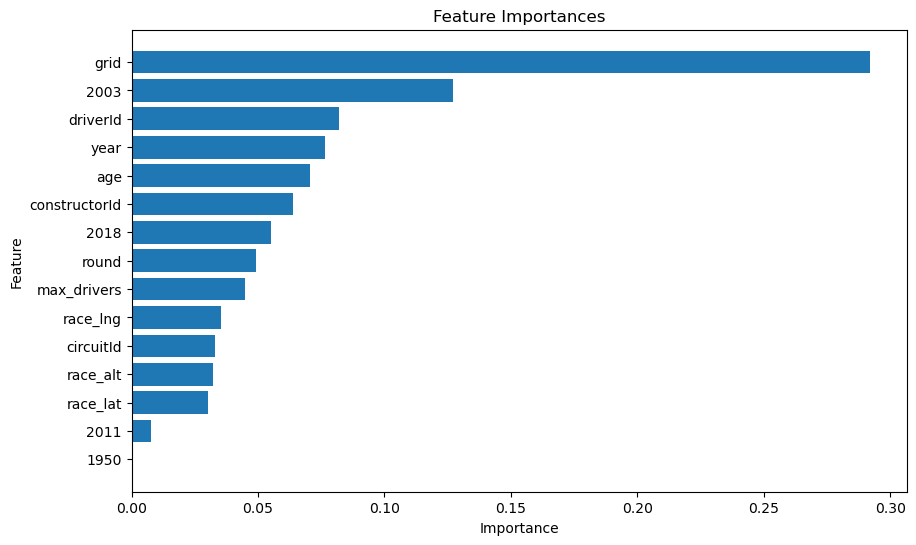

In [335]:
# Show the feature importances for Variant 1
feature_importances = ens_rfr.feature_importances_

# Create a DataFrame for the feature importances
features = ensemble_df_train_full.columns  # If X is a DataFrame, otherwise replace this with the names of the features
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the feature importances
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

  Feature  Importance
3    1950    0.683366
0    2003    0.235191
1    2011    0.062447
2    2018    0.018996


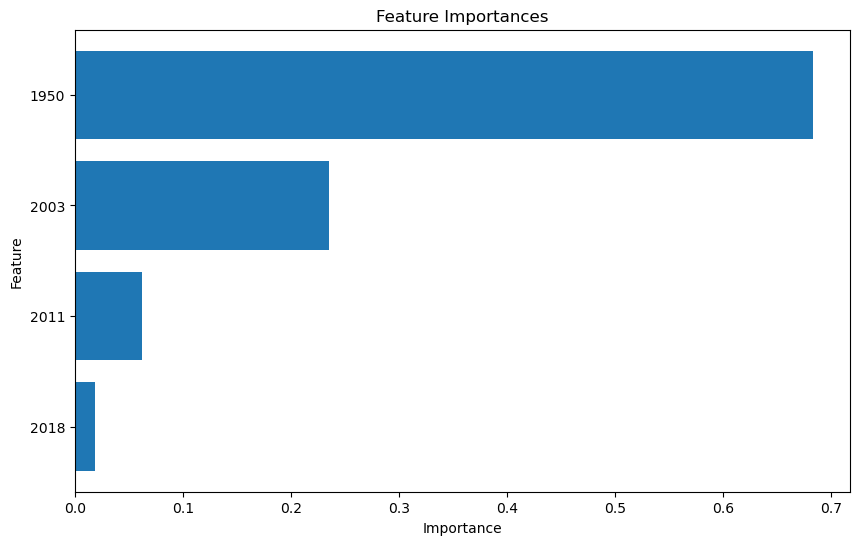

In [336]:
# Show the feature importances for Variant 2
feature_importances = ens_rfr2.feature_importances_

# Create a DataFrame for the feature importances
features = ensemble_df.columns  # If X is a DataFrame, otherwise replace this with the names of the features
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the feature importances
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

Thats a big difference betweeen the two variants. The model2018 which is irrelevant for Variant 1, is super important in Variant 2.

### Confusion Matrix

array([ 6, 10, 11, ...,  7, 17, 19])

array([11.95, 10.64, 14.07, ...,  7.44, 12.66, 17.5 ])

Confusion Matrix:
[[ 5 18 18 ...  0  0  0]
 [ 2  6 15 ...  0  0  0]
 [ 0  0  7 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]

Accuracy: 0.06928838951310862


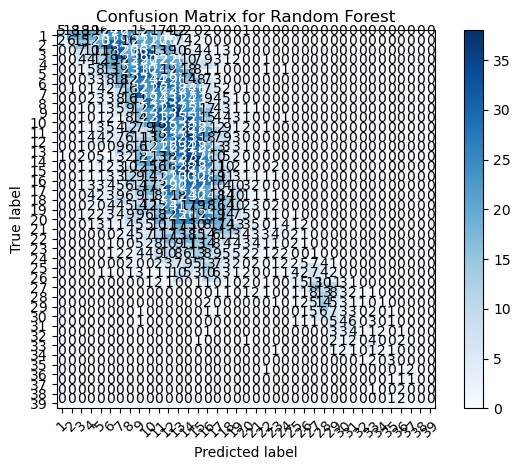

In [170]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

display(y_test)
display(ens_rfr_pred)

print("Confusion Matrix:")
print(confusion_matrix(y_test, ens_rfr_pred_labels))
print()

print("Accuracy: {}".format(accuracy_score(y_test, ens_rfr_pred_labels)))

# Compute confusion matrix
cm = confusion_matrix(y_test, ens_rfr_pred_labels)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot the confusion matrix
class_names = label_encoder.classes_
plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix for Random Forest')
plt.show()

array([ 6, 10, 11, ...,  7, 17, 19])

array([11.46, 12.2 , 17.9 , ...,  7.39, 11.64, 17.94])

Confusion Matrix:
[[17 19 18 ...  0  0  0]
 [ 8 13 15 ...  0  0  0]
 [ 2 10  7 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  0  0]]

Accuracy: 0.06554307116104868


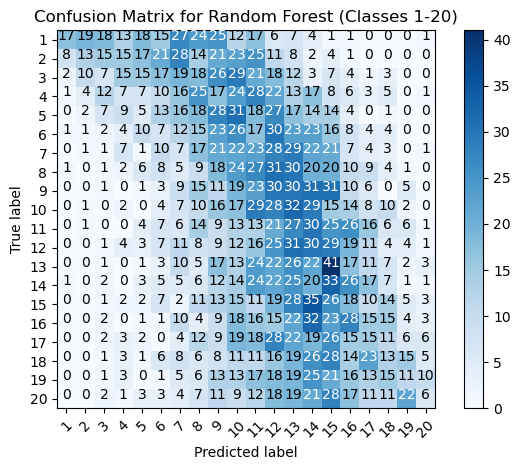

In [337]:
#Confusion Matrix for only the classes 1-20 to have a better overview

import itertools
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Display the test labels and predictions
display(y_test)
display(ens_rfr_pred)

print("Confusion Matrix:")
print(confusion_matrix(y_test, ens_rfr_pred_labels))
print()

print("Accuracy: {}".format(accuracy_score(y_test, ens_rfr_pred_labels)))

# Compute confusion matrix
cm = confusion_matrix(y_test, ens_rfr_pred_labels)

# Select only classes 1-20
selected_classes = np.arange(1, 21)
cm_selected = cm[selected_classes - 1, :][:, selected_classes - 1]

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot the confusion matrix for selected classes
class_names = label_encoder.classes_[selected_classes - 1]
plot_confusion_matrix(cm_selected, classes=class_names, title='Confusion Matrix for Random Forest (Positions 1-20)')
plt.show()

### ROC- Curve

Does not work for a randomforrestregressor. Maybe change meta model.

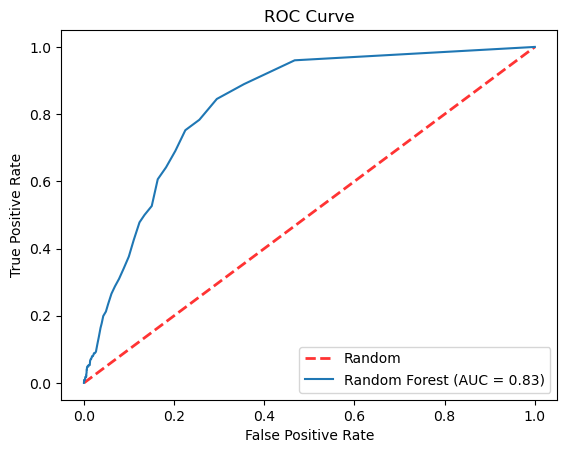

Thresholds: [ inf 0.83 0.77 0.74 0.73 0.71 0.7  0.68 0.67 0.66 0.64 0.62 0.51 0.5
 0.49 0.47 0.46 0.45 0.44 0.43 0.42 0.41 0.4  0.39 0.38 0.37 0.36 0.35
 0.34 0.33 0.32 0.31 0.3  0.29 0.28 0.27 0.26 0.25 0.24 0.23 0.22 0.21
 0.2  0.19 0.18 0.17 0.16 0.15 0.14 0.13 0.12 0.11 0.1  0.09 0.08 0.07
 0.06 0.05 0.04 0.03 0.02 0.01 0.  ]


In [330]:

from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Berechne die Klassenwahrscheinlichkeiten (Confidences) für das Test-Set
proba_for_each_class = ens_rfr.predict_proba(ensemble_df_test_full)

# Berechne die ROC-Kurve
fpr, tpr, thresholds = roc_curve(y_test, proba_for_each_class[:, 1], pos_label=1)

# Berechne die AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot die Linie für zufälliges Raten
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

# Plot die ROC-Kurve für den Classifier
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')

# Zeige den Plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Zeige die Schwellenwerte
print("Thresholds:", thresholds)

## Compare Ensemble Performance with 4 Models

In [ ]:
# Add ens_rfr_pred to ensemble_df_test for comparison
model_comparison = ensemble_df_test.copy()
model_comparison['ens_pred'] = ens_rfr_pred
model_comparison['y_test'] = y_test

# Display the updated DataFrame
model_comparison.head()

,2003,2011,2018,1950,ens_pred,y_test
0,20,19,19,13,11.95,6
1,17,21,19,5,10.64,10
2,17,10,14,18,14.07,11
3,17,19,19,7,10.15,15
4,20,19,19,11,10.50,5


### Comaprison to performance of the 4 models

In [179]:
pred2018 = model2018.predict(X_test_2018)
pred2011 = model2011.predict(X_test_2011)
pred2003 = model2003.predict(X_test_2003)
pred1950 = model1950.predict(X_test_1950)

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse2018 = sqrt(mean_squared_error(y_test, pred2018))
rmse2011 = sqrt(mean_squared_error(y_test, pred2011))
rmse2003 = sqrt(mean_squared_error(y_test, pred2003))
rmse1950 = sqrt(mean_squared_error(y_test, pred1950))

print("RMSE 2018:", rmse2018)
print("RMSE 2011:", rmse2011)
print("RMSE 2003:", rmse2003)
print("RMSE 1950:", rmse1950)

RMSE 2018: 10.282498494086877
RMSE 2011: 9.945817633031139
RMSE 2003: 10.334843432004423
RMSE 1950: 9.284899746140512


In [180]:
# Predictions for train data
pred2018_train = model2018.predict(X_train_2018)
pred2011_train = model2011.predict(X_train_2011)
pred2003_train = model2003.predict(X_train_2003)
pred1950_train = model1950.predict(X_train_1950)

# RMSE for train data
rmse2018_train = sqrt(mean_squared_error(y_train, pred2018_train))
rmse2011_train = sqrt(mean_squared_error(y_train, pred2011_train))
rmse2003_train = sqrt(mean_squared_error(y_train, pred2003_train))
rmse1950_train = sqrt(mean_squared_error(y_train, pred1950_train))

print("RMSE 2018 (Train):", rmse2018_train)
print("RMSE 2011 (Train):", rmse2011_train)
print("RMSE 2003 (Train):", rmse2003_train)
print("RMSE 1950 (Train):", rmse1950_train)

RMSE 2018 (Train): 10.255817709992897
RMSE 2011 (Train): 9.94616342894997
RMSE 2003 (Train): 10.303332881984772
RMSE 1950 (Train): 9.283987545176151


In [176]:
#Prediciton on partinioned data for 2003 model
pred2003_part = model2003.predict(X_test_2003c)
mse2003_part = mean_squared_error(y_test_2003c, pred2003_part)

print("RMSE 2003:", sqrt(mse2003_part))

MSE 2003: 5.665294282116261


In [177]:
#Prediciton on partinioned data for 1950 model
pred1950_part = model1950.predict(X_test_1950c) #only difference between X_test_1950 and X_test_1950c is the scaling
mse1950_part = mean_squared_error(y_test_1950, pred1950_part)

print("RMSE 1950:", sqrt(mse1950_part))

MSE 1950: 7.321662486965218


In [178]:
#Prediciton on non-partinioned data for 1950 model
pred1950_nonpart = model1950.predict(X_test_1950) #only difference between X_test_1950 and X_test_1950c is the scaling
mse1950_nonpart = mean_squared_error(y_test_1950, pred1950_nonpart)

print("nonpart. RMSE 1950:", sqrt(mse1950_nonpart))

nonpart. MSE 1950: 9.284899746140512


# Results

Scaling makes a huge difference.

One more option: Change Ensemble that only the classifiers vote if the test race data point is from their part of the partinioned data.

Does it make Sense to train the models only on their partinioned data, for example on data 2011-2024 for model2011, but use the model to make predictions on data from outside their partition (for example 1960)? Model would be better if they would have been trained on the whole data i guess. The model form 2011 only learns their classes (1-24) and will never predict a race with position>24 right. 

Maybe a regressor would have been the better variant, since the target variable is kind of numeric or ordered.
1) Possible to try different ensemble (see on top) --> Variant 3
2) Try a RandomForrestRegressor on the 4 partinioned models. --> It was bether... damn